In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 아버지와 아들의 키 - Galton

In [33]:
df = pd.read_csv("http://www.randomservices.org/random/data/Galton.txt", sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌
- 컬럼명을 Father, Son 으로 변경
- 단위 변경 (in -> cm)

In [34]:
df = df[df["Gender"] == "M"]
df = df[["Father","Height"]]
df.columns = ["Father","Son"]
df = df.iloc[:] * 2.54
df

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070
...,...,...
890,173.99,182.880
891,173.99,179.070
892,173.99,174.498
893,173.99,173.990


- 산점도 그리기

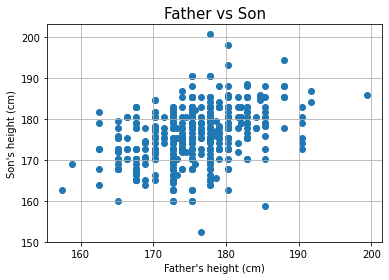

In [36]:
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title("Father vs Son", fontsize=15)
plt.show()

- 회귀선 구하고 그리기
    - np.linalg.lstsq()
    - np.polyfit()

In [37]:
weight, bias = np.polyfit(df.Father, df.Son, 1)     # x, y, 차수
weight, bias

(0.44774791760302307, 97.17763700739373)

In [39]:
# 회귀식을 2차식으로
np.polyfit(df.Father, df.Son, 2)

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [40]:
xs = np.array([156,201])
ys = xs * weight + bias
ys

array([167.02631215, 187.17496845])

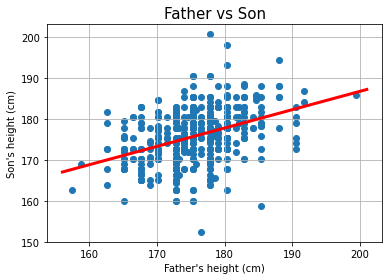

In [42]:
plt.scatter(df.Father, df.Son)
plt.plot(xs, ys, 'r-', lw=3)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title("Father vs Son", fontsize=15)
plt.show()

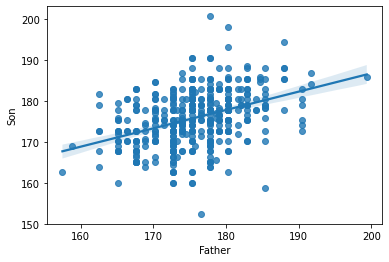

In [43]:
import seaborn as sns
sns.regplot(x="Father",y="Son",data=df);

- Scikit-learn 으로 회귀식 구하기

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [45]:
# 학습 메소드
lr.fit(df[['Father']], df.Son)
# lr.fit(df.Father.values.reshape(-1, 1), df.Son.values)

LinearRegression()

In [46]:
# coefficient(계수), weight
lr.coef_

array([0.44774792])

In [47]:
# intercept(절편), bias
lr.intercept_

97.17763700739346

In [48]:
# 잔차 제곱의 합(RSS: Residual Sum of Square)
lr._residues

17556.59951549399

In [49]:
# 평가  - R squared
lr.score(df.Father.values.reshape(-1, 1), df.Son.values)

C:\ProgramData\Miniconda3\envs\kdig\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.15312927478306992

In [50]:
from sklearn.metrics import r2_score
pred = lr.predict(df.Father.values.reshape(-1, 1))
r2_score(df.Son.values, pred)

C:\ProgramData\Miniconda3\envs\kdig\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.15312927478306992